In [2]:
import pandas as pd

# Veri yükleme
df = pd.read_csv('fashionnova_reviews.csv')

# Yalnızca gerekli sütunlar
df = df[['Review Text', 'Review Title']]

# Boş değerleri kaldırma
df.dropna(inplace=True)


In [3]:
df.head()

,Review Text,Review Title
0,I love ordering from fashion nova. The clothes...,I love ordering from fashion nova
1,Always amazing clothes and the fast shipping i...,Top tier content for fashion nova
2,Prices and quality of products are GREAT Would...,Prices and quality of products are…
3,Great customer service. I was helped until the...,Great customer service
4,Disappointing experience. You don’t live up to...,False advertising


In [4]:
df['Full Review'] = df['Review Title'] + " " + df['Review Text']


In [5]:
df.head()

,Review Text,Review Title,Full Review
0,I love ordering from fashion nova. The clothes...,I love ordering from fashion nova,I love ordering from fashion nova I love order...
1,Always amazing clothes and the fast shipping i...,Top tier content for fashion nova,Top tier content for fashion nova Always amaz...
2,Prices and quality of products are GREAT Would...,Prices and quality of products are…,Prices and quality of products are… Prices and...
3,Great customer service. I was helped until the...,Great customer service,Great customer service Great customer service....
4,Disappointing experience. You don’t live up to...,False advertising,False advertising Disappointing experience. Yo...


In [6]:
from textblob import TextBlob

# Duygu analizi fonksiyonu
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Duygu analizi uygulama
df['Sentiment'] = df['Full Review'].apply(analyze_sentiment)


In [7]:
avg_sentiment = df['Sentiment'].mean()
print(f'Average Sentiment: {avg_sentiment}')


Average Sentiment: 0.3949428575516316


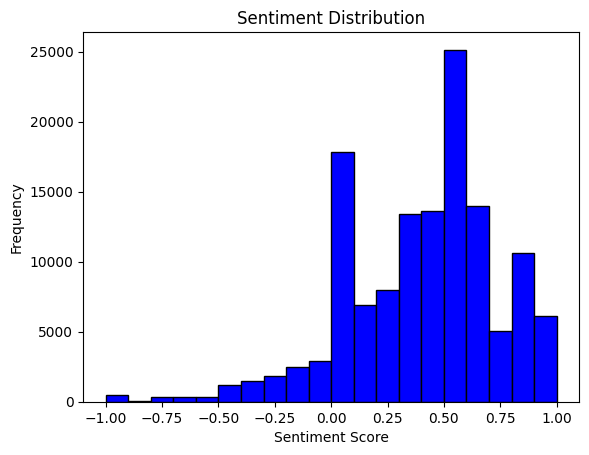

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['Sentiment'], bins=20, color='blue', edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


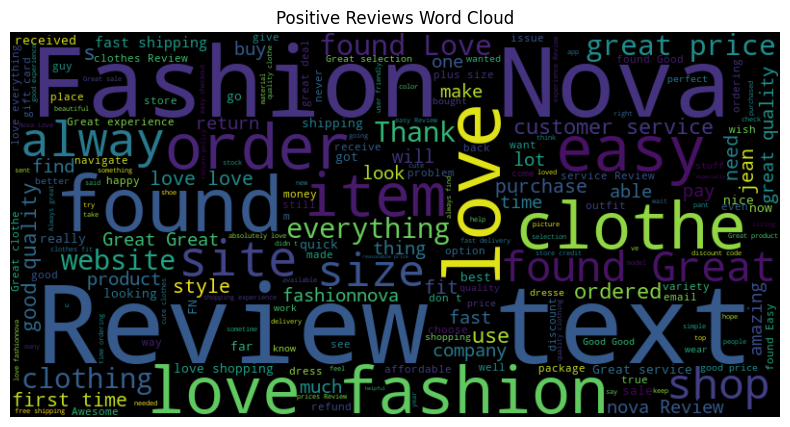

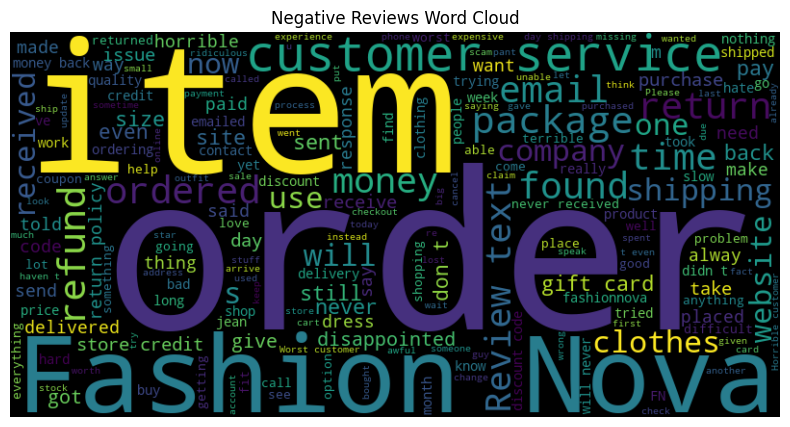

In [9]:
from wordcloud import WordCloud

positive_reviews = df[df['Sentiment'] > 0]['Full Review']
negative_reviews = df[df['Sentiment'] < 0]['Full Review']

positive_wordcloud = WordCloud(width=800, height=400).generate(' '.join(positive_reviews))
negative_wordcloud = WordCloud(width=800, height=400).generate(' '.join(negative_reviews))

plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()
